In [1]:
import  pandas  as pd
import  numpy  as np
from sklearn.datasets import load_iris


In [40]:
data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)

In [41]:
df['Species'] = data.target

In [42]:
df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [11]:
df = df[df['Species'] != 0][['sepal width (cm)','petal length (cm)','Species']]

In [12]:
df

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


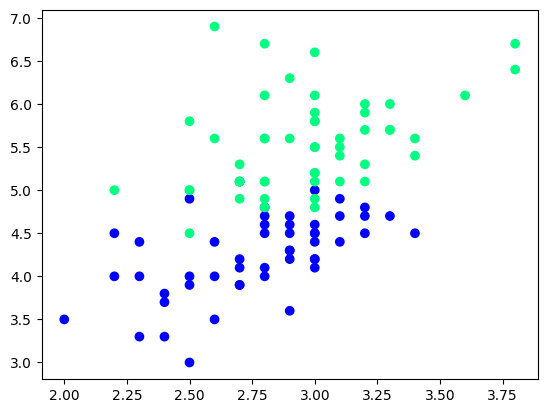

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c = df['Species'],cmap = 'winter')

In [17]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),Species
82,2.7,3.9,1
98,2.5,3.0,1
94,2.7,4.2,1
74,2.9,4.3,1
51,3.2,4.5,1
68,2.2,4.5,1
104,3.0,5.8,2
81,2.4,3.7,1
95,3.0,4.2,1
90,2.6,4.4,1


In [18]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)


# creating sample test data

In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

## function for regional view of df data


In [22]:
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
def evaluate(clf,x,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(x.values,y.values,clf = clf, legend = 2)

# Case 1  - Bagging

In [20]:
# data  for tree1
df_bag = df_train.sample(8,replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

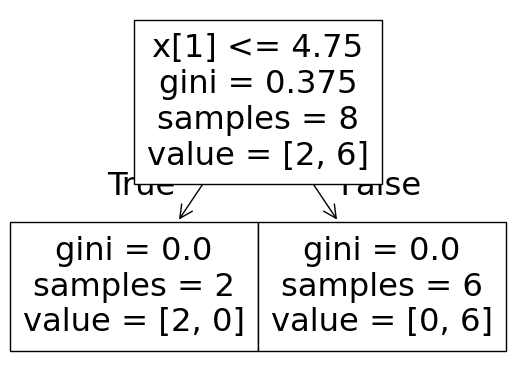

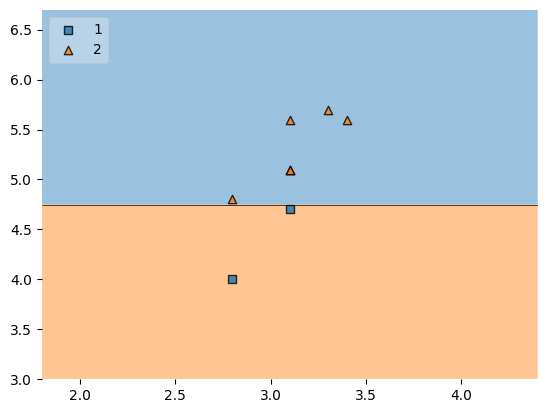

In [24]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

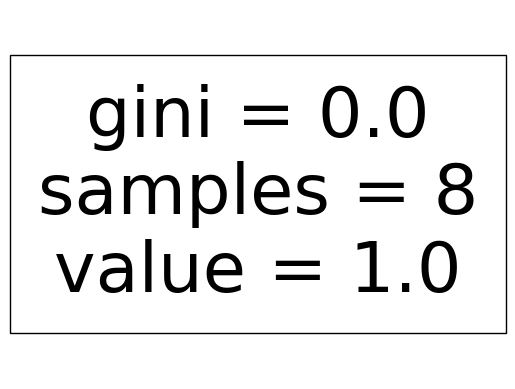

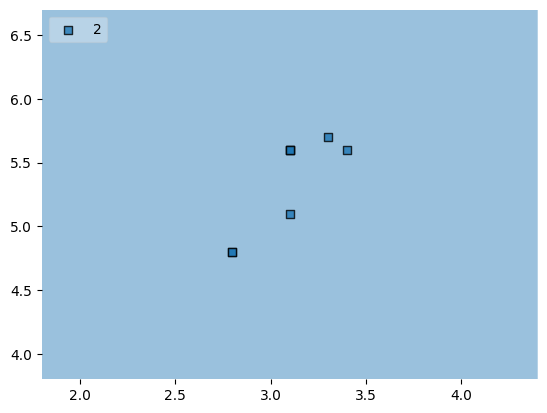

In [28]:
# data  for tree2
df_bag = df_train.sample(8,replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

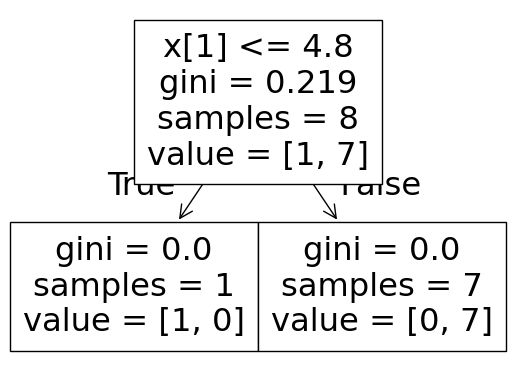

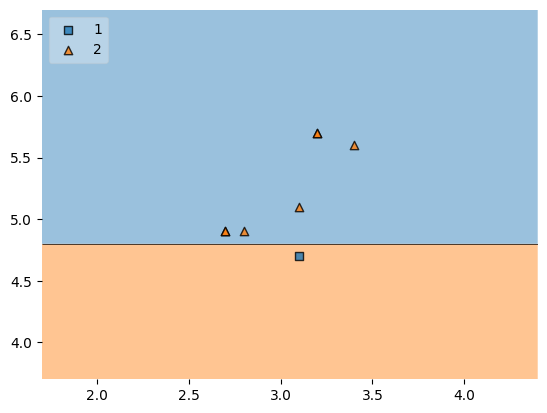

In [29]:
# data  for tree3
df_bag = df_train.sample(8,replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [36]:
print('dt_bag1 predict',dt_bag1.predict(np.array([2.2,5.1]).reshape(1,2)))
print('dt_bag2 predict',dt_bag2.predict(np.array([2.2,5.1]).reshape(1,2)))
print('dt_bag3 predict',dt_bag3.predict(np.array([2.2,5.1]).reshape(1,2)))

dt_bag1 predict [2]
dt_bag2 predict [2]
dt_bag3 predict [2]


In [37]:
# Pasting  ---> there is no replace is used raw sample is done

In [38]:
# Random Subspaces
# in bagging like replace is done but there is samplin in columns now not for rows
df.sample(2,replace=True,axis=1)

,sepal width (cm),Species
133,2.8,2
76,2.8,1
104,3.0,2
87,2.3,1
64,2.9,1
...,...,...
148,3.4,2
116,3.0,2
93,2.3,1
99,2.8,1


In [44]:
# Random patches
df
# sampling is donewith replace  in both rows wise and columns wise
df.sample(8,replace=True).sample(2,replace=True,axis=1)


,sepal length (cm),Species
98,5.1,1
85,6.0,1
19,5.1,0
133,6.3,2
10,5.4,0
122,7.7,2
39,5.1,0
54,6.5,1
